# MIDTERM CS370 

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits. 



In [ ]:
Enntropy formula : H(X) = – Σ (pi * log2 pi)
    
    
 For this example H(X) = – [(pi * log2 pi) + (qi * log2 qi)]   =

– [(0.70 * log2 (0.70)) + (0.30 * log2 (0.30))] = 0.88129089


 Coin entropy being less than 1 bit indicates that there is less uncertainty or randomness compared to a fair coin




#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

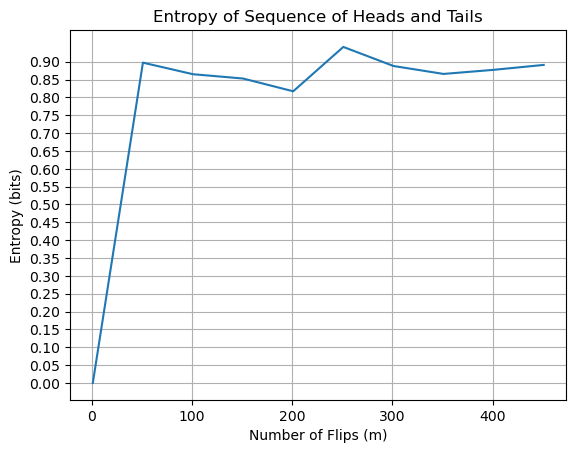

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_entropy(p_heads):
    if p_heads == 0 or p_heads == 1:
        return 0  
    p_tails = 1 - p_heads
    entropy = -(p_heads * np.log2(p_heads) + p_tails * np.log2(p_tails))
    return entropy


m_values = np.arange(1, 501, 50)
entropy_values = []


p_heads = 0.7
p_tails=0.3

for m in m_values:
    
    run= np.random.choice(['H', 'T'], size=m, p=[p_heads, p_tails])
    Heads_sum = np.sum(run == 'H')    
    tot_heads = Heads_sum / m
    entropy = calculate_entropy(tot_heads)
    entropy_values.append(entropy)

plt.plot(m_values, entropy_values)
plt.title('Entropy of Sequence of Heads and Tails')
plt.xlabel('Number of Flips (m)')
plt.ylabel('Entropy (bits)')

plt.yticks(np.arange(0, max(entropy_values), 0.05))
plt.grid(True)
plt.show()


#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here. 

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100]. 

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



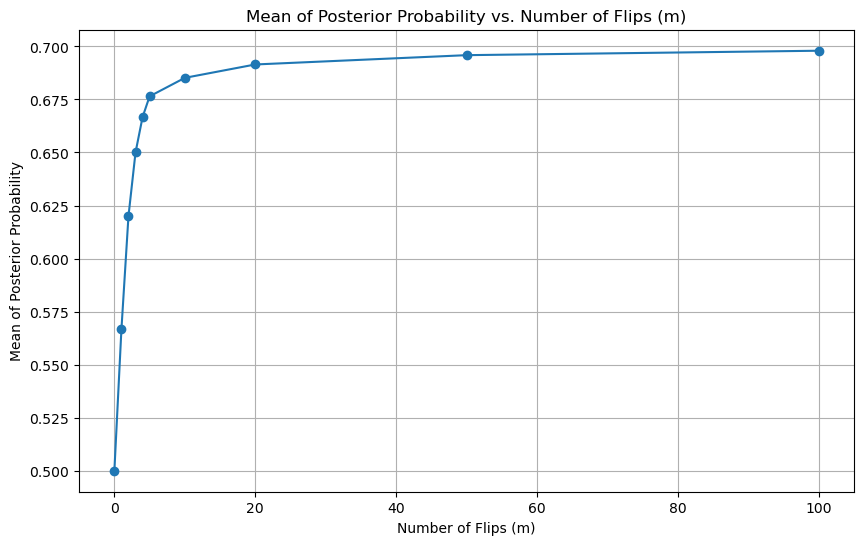

m	Mean	Variance
0	0.5000	0.083333
1	0.5667	0.061389
2	0.6200	0.039267
3	0.6500	0.025278
4	0.6667	0.017094
5	0.6765	0.012159
10	0.6852	0.007704
20	0.6915	0.004444
50	0.6959	0.002160
100	0.6980	0.001065


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters of the bent coin
p_heads_true = 0.7  # Probability of getting heads
p_tails_true = 0.3  # Probability of getting tails

# Prior distribution parameters (Beta distribution parameters)
alpha_prior = 1  # Prior shape parameter since we do not have a strong opnion to base this number on we will leave it at one 
beta_prior = 1   # Prior scale parameter since we do not have a strong opnion to base this number on we will leave it at one 

# Values of m to consider (number of coin flips)
m_values = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100]

# Function to update posterior distribution
def update_posterior(alpha_prior, beta_prior, m, p_heads_true, p_tails_true):
    """
The whole idea behind bayesian paramter learning is that we are tring to estimate unkown paramters by incorporating prior knowledge and updating
it with observed data using bayes therom .

p(A|B)= (P(B|A) X P(A))/P(B)

1) P(A) ---> prior distribution : before oberving the data this is ( exisiting data or assumptions)
2) P(B|A)----> Likliehood function : how likley to see the data observed 
3)P(A|B) ----> Posterior probability : This is the updated nelief based on the new data 
4) P(B) ---> This is just a constetnt to keep the result between 0 and 1 
    """
    # Update parameters based on observed data
    alpha_posterior = alpha_prior + m * p_heads_true
    beta_posterior = beta_prior + m * p_tails_true
    return alpha_posterior, beta_posterior

# Initialize lists to store mean and variance of posterior distribution
means = []       
variances = []   

# Iterate over m values
for m in m_values:
    # Update posterior distribution
    alpha_posterior, beta_posterior = update_posterior(alpha_prior, beta_prior, m, p_heads_true, p_tails_true)
    
    # Calculate mean and variance of posterior distribution
    mean_posterior = alpha_posterior / (alpha_posterior + beta_posterior) # mean of the beta disribution 
    variance_posterior = (alpha_posterior * beta_posterior) / ((alpha_posterior + beta_posterior)**2 * (alpha_posterior + beta_posterior + 1)) # variance of the beta disribution 
    
    # Append mean and variance to lists
    means.append(mean_posterior)
    variances.append(variance_posterior)

    # Update prior for next iteration
    alpha_prior = alpha_posterior
    beta_prior = beta_posterior

# Plotting mean of posterior distribution
plt.figure(figsize=(10, 6))
plt.plot(m_values, means, marker='o')
plt.title('Mean of Posterior Probability vs. Number of Flips (m)')
plt.xlabel('Number of Flips (m)')
plt.ylabel('Mean of Posterior Probability')
plt.grid(True)
plt.show()

# Displaying means and variances in a table
print("m\tMean\tVariance")
for i in range(len(m_values)):
    print(f"{m_values[i]}\t{means[i]:.4f}\t{variances[i]:.6f}")


### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases. 

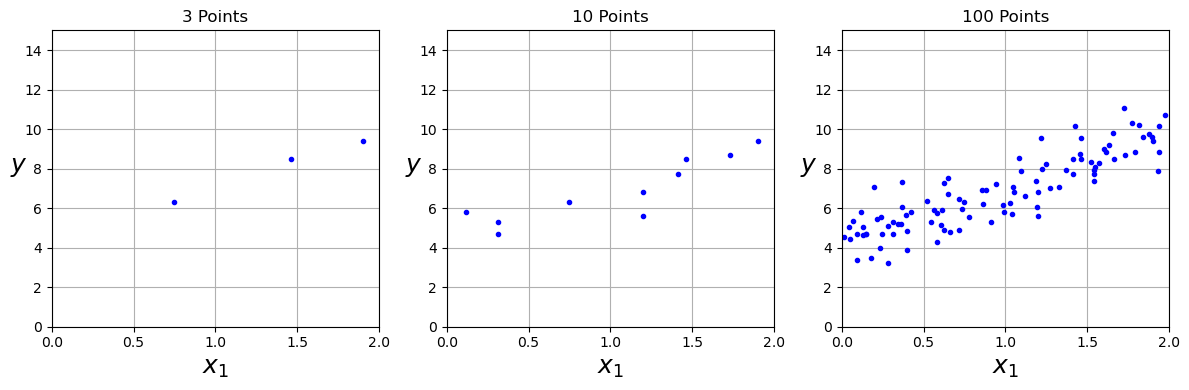

In [20]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  

# Function to plot the points
def plot_points(X, y, title):
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.title(title)
    plt.axis([0, 2, 0, 15])  
    plt.grid(True)


m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

# Plot 3 points
plt.figure(figsize=(12, 4))
plt.subplot(131)
plot_points(X[:3], y[:3], "3 Points")

# Plot 10 points
plt.subplot(132)
plot_points(X[:10], y[:10], "10 Points")

# Plot 100 points
plt.subplot(133)
plot_points(X, y, "100 Points")

plt.tight_layout()
plt.show()


#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). 

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.

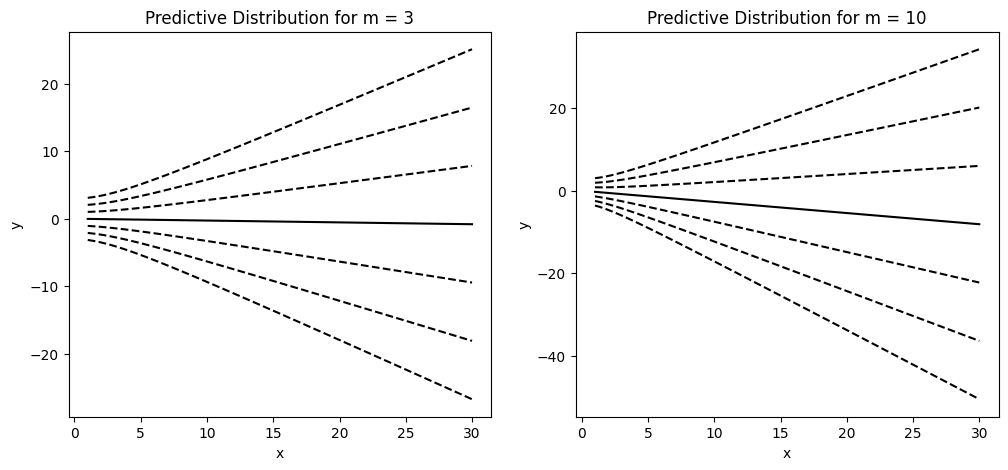

In [ ]:
'''
This script demonstrates Bayesian linear regression using the framework of probabilistic graphical models. 
Bayesian regression provides a probabilistic approach to regression, offering not only predictions but also measures of uncertainty associated with those predictions.

Classes:
- BayesianRegression: A class implementing Bayesian linear regression, which models the relationship between independent variables and dependent variables in a probabilistic manner.
    Methods:
        __init__: Initializes the Bayesian regression model with given precision parameters for prior and likelihood distributions.
        _is_prior_defined: Checks if prior distribution parameters are defined.
        _get_prior: Returns the parameters of the prior distribution.
        fit: Fits the Bayesian regression model to training data by updating the parameters based on the provided training dataset.
        predict: Predicts the mean and optionally the standard deviation of the predictive distribution given input data.

Theory:
- Bayesian Regression:
    - The model assumes a prior distribution over the parameters, typically a Gaussian distribution.
    - The likelihood function is assumed to be Gaussian as well.
    - By using Bayes' theorem, the posterior distribution over parameters is obtained, which provides a distribution over possible values of the parameters given the observed data.

Equations:
- Prior distribution over parameters w:
    w ~ N(w|0, alpha^(-1)I)
    where alpha is the precision parameter of the prior.

- Likelihood function:
    t ~ N(t|X @ w, beta^(-1))
    where t is the target variable, X is the input data, and beta is the precision parameter of the likelihood.

- Posterior distribution over parameters w:
    p(w|t) = N(w|w_mean, w_cov)
    where w_mean and w_cov are updated based on the training data.

Steps:
1. Generate Synthetic Data:
    - Generate synthetic data points for training, each with features and corresponding target values.

2. Instantiate BayesianRegression:
    - Create instances of BayesianRegression class with desired precision parameters.

3. Fit the Model:
    - Fit the Bayesian regression model to the training data, updating the parameters based on the observed data.

4. Predict Mean and Standard Deviation:
    - Predict the mean and standard deviation of the predictive distribution for the given input data points.
    - Optionally, sample from the predictive distribution.

5. Plot Results:
    - Visualize the predictive distribution for different numbers of data points.

'''

import numpy as np
import matplotlib.pyplot as plt
from prml.linear._regression import Regression


class BayesianRegression(Regression):
    """Bayesian regression model.

    w ~ N(w|0, alpha^(-1)I)
    y = X @ w
    t ~ N(t|X @ w, beta^(-1))
    """

    def __init__(self, alpha: float = 1., beta: float = 1.):
        """Initialize bayesian linear regression model.

        Parameters
        ----------
        alpha : float, optional
            Precision parameter of the prior, by default 1.
        beta : float, optional
            Precision parameter of the likelihood, by default 1.
        """
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_precision = None

    def _is_prior_defined(self) -> bool:
        return self.w_mean is not None and self.w_precision is not None

    def _get_prior(self, ndim: int) -> tuple:
        if self._is_prior_defined():
            return self.w_mean, self.w_precision
        else:
            return np.zeros(ndim), self.alpha * np.eye(ndim)

    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        """Bayesian update of parameters given training dataset.

        Parameters
        ----------
        x_train : np.ndarray
            training data independent variable (N, n_features)
        y_train :  np.ndarray
            training data dependent variable
        """
        mean_prev, precision_prev = self._get_prior(np.size(x_train, 1))

        w_precision = precision_prev + self.beta * x_train.T @ x_train
        w_mean = np.linalg.solve(
            w_precision,
            precision_prev @ mean_prev + self.beta * x_train.T @ y_train,
        )
        self.w_mean = w_mean
        self.w_precision = w_precision
        self.w_cov = np.linalg.inv(self.w_precision)

    def predict(
        self,
        x: np.ndarray,
        return_std: bool = False,
        sample_size: int = None,
    ):
        """Return mean (and standard deviation) of predictive distribution.

        Parameters
        ----------
        x : np.ndarray
            independent variable (N, n_features)
        return_std : bool, optional
            flag to return standard deviation (the default is False)
        sample_size : int, optional
            number of samples to draw from the predictive distribution
            (the default is None, no sampling from the distribution)

        Returns
        -------
        y : np.ndarray
            mean of the predictive distribution (N,)
        y_std : np.ndarray
            standard deviation of the predictive distribution (N,)
        y_sample : np.ndarray
            samples from the predictive distribution (N, sample_size)
        """
        if sample_size is not None:
            w_sample = np.random.multivariate_normal(
                self.w_mean, self.w_cov, size=sample_size,
            )
            y_sample = x @ w_sample.T
            return y_sample
        y = x @ self.w_mean
        if return_std:
            y_var = 1 / self.beta + np.sum(x @ self.w_cov * x, axis=1)
            y_std = np.sqrt(y_var)
            return y, y_std
        return y
    
# Step 1: Generate synthetic data for m=3 and m=10
m_small = 3
x_small = np.linspace(0, 3, m_small)
y_small = np.sin(2 * np.pi * x_small) + np.random.normal(scale=0.2, size=m_small)

m_large = 10
x_large = np.linspace(0, 1, m_large)
y_large = np.sin(2 * np.pi * x_large) + np.random.normal(scale=0.2, size=m_large)

# Step 2: Instantiate BayesianRegression with desired parameters
small = BayesianRegression()
large = BayesianRegression()

# Step 3: Fit the model to the training data
small.fit(x_small[:, np.newaxis], y_small)
large.fit(x_large[:, np.newaxis], y_large)

# Step 4: Predict mean and standard deviation of the predictive distribution
x_pred = np.linspace(1, 30, 100)

# For m=3
y_pred_small, y_std_small = small.predict(x_pred[:, np.newaxis], return_std=True)

# For m=10
y_pred_large, y_std_large = large.predict(x_pred[:, np.newaxis], return_std=True)

# Plot the results
plt.figure(figsize=(12, 5))

# For m=3
plt.subplot(1, 2, 1)
plt.plot(x_pred, y_pred_small, color='black', label='Mean')
plt.plot(x_pred, y_pred_small - y_std_small, color='black', linestyle='--')
plt.plot(x_pred, y_pred_small + y_std_small, color='black', linestyle='--')
plt.plot(x_pred, y_pred_small - 2*y_std_small, color='black', linestyle='--')
plt.plot(x_pred, y_pred_small + 2*y_std_small, color='black', linestyle='--')
plt.plot(x_pred, y_pred_small - 3*y_std_small, color='black', linestyle='--')
plt.plot(x_pred, y_pred_small + 3*y_std_small, color='black', linestyle='--')
plt.title('Predictive Distribution for m = 3')
plt.xlabel('x')
plt.ylabel('y')

# For m=10
plt.subplot(1, 2, 2)
plt.plot(x_pred, y_pred_large, color='black', label='Mean')
plt.plot(x_pred, y_pred_large - y_std_large, color='black', linestyle='--')
plt.plot(x_pred, y_pred_large + y_std_large, color='black', linestyle='--')
plt.plot(x_pred, y_pred_large - 2*y_std_large, color='black', linestyle='--')
plt.plot(x_pred, y_pred_large + 2*y_std_large, color='black', linestyle='--')
plt.plot(x_pred, y_pred_large - 3*y_std_large, color='black', linestyle='--')
plt.plot(x_pred, y_pred_large + 3*y_std_large, color='black', linestyle='--')
plt.title('Predictive Distribution for m = 10')
plt.xlabel('x')
plt.ylabel('y')

#plt.tight_layout()
plt.show()
